In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import scipy.signal as sig
import scipy

In [2]:
def matlab_style_gauss2D(shape,sigma):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [3]:
img = cv2.imread('IMGP2395.JPG',0)

In [4]:
img

array([[255, 255, 255, ...,  60,  59,  59],
       [255, 255, 255, ...,  60,  60,  59],
       [255, 255, 255, ...,  61,  61,  60],
       ..., 
       [141, 141, 141, ..., 117, 116, 116],
       [141, 140, 142, ..., 116, 116, 117],
       [141, 141, 143, ..., 115, 115, 117]], dtype=uint8)

In [5]:
sigmaA=8
sigmaB=10

In [6]:
sigmaMax=max(sigmaA,sigmaB)
fsz=[sigmaMax, sigmaMax]

In [7]:
kernelA=matlab_style_gauss2D(fsz,sigmaA)
kernelB=matlab_style_gauss2D(fsz,sigmaB)


In [8]:
imgA = sig.convolve2d(img, kernelA, boundary='symm', mode='same')
imgB = sig.convolve2d(img, kernelB, boundary='symm', mode='same')

In [9]:
R1=img-imgA

In [10]:
R2=img-imgB

In [12]:
R=np.divide(R1,R2,out=np.zeros_like(R1), where=R2!=0)

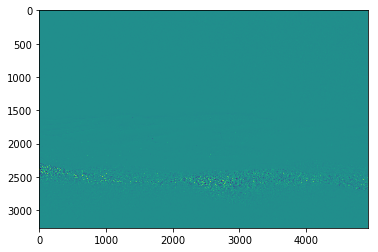

In [13]:
plt.imshow(R2)

In [14]:
Rf=scipy.ndimage.maximum_filter(R,size=8)

In [15]:
len(Rf)

3264

In [16]:
len(Rf[0])

4928

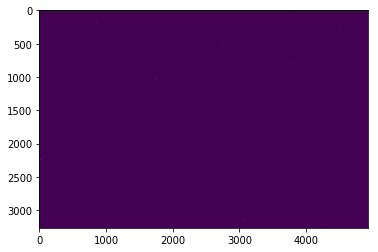

In [17]:
plt.imshow(Rf)

In [18]:
blurmap=np.divide((sigmaA*sigmaB),((sigmaB-sigmaA)*Rf+sigmaB))


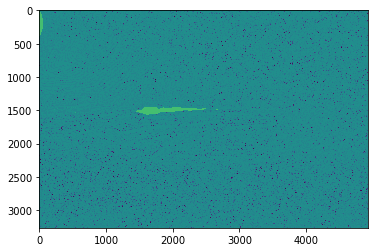

In [19]:
plt.imshow(blurmap)